In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("survey.csv")

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
print("shape of dataset:" ,df.shape)

shape of dataset: (1259, 27)


In [13]:
print("\ncolumn names:\n", df.columns)


column names:
 Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [15]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [17]:
 df.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [19]:
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False))


Missing Values:
 comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


In [21]:
df.drop('comments', axis=1, inplace=True)


In [23]:
df.drop('state', axis=1, inplace=True)


In [27]:
print(df.columns.tolist())



['Timestamp', 'Age', 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [29]:
df['work_interfere'].fillna("Not sure", inplace=True)


In [33]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")



In [37]:
print("self_employed" in df.columns)



True


In [41]:
print(df['self_employed'].unique())
print(df['self_employed'].dtype)



['Prefer not to say' 'Yes' 'No']
object


In [43]:
df['self_employed'] = df['self_employed'].fillna("Prefer not to say")


Age Distribution

In [50]:
print("Minimum age:", df['age'].min())
print("Maximum age:", df['age'].max())


Minimum age: -1726
Maximum age: 99999999999


In [52]:
df = df[(df['age'] >= 15) & (df['age'] <= 100)]


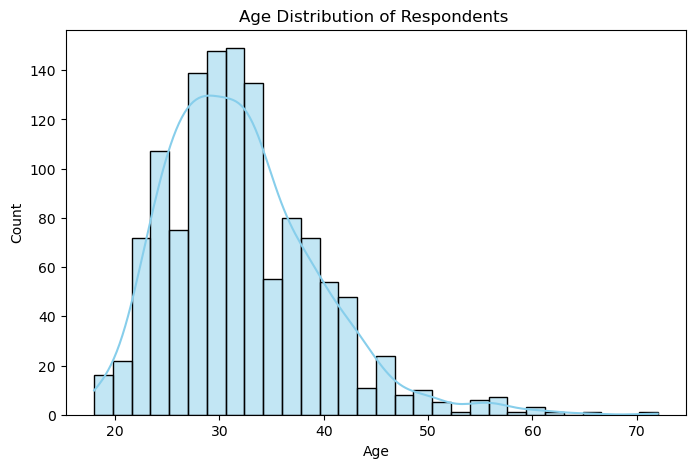

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Respondents ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
Gender Distribution

In [61]:
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'male-ish', 'maile', 'mal', 'cis male', 'man', 'msle', 'malr', 'mail']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake', 'female ', 'cis-female', 'female (cis)', 'femail']:
        return 'Female'
    else:
        return 'Other'

df['gender'] = df['gender'].apply(clean_gender)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27292\2375486935.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


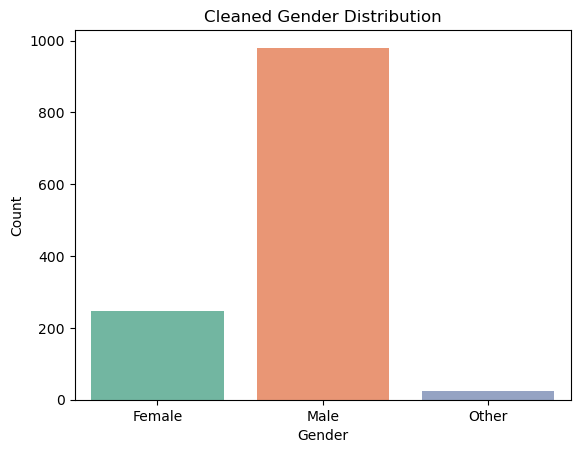

In [63]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Cleaned Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
Gender vs Mental Health Treatment

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27292\850938152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df, palette='pastel')


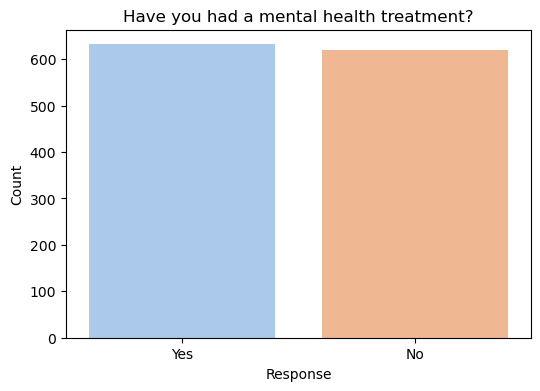

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df, palette='pastel')
plt.title("Have you had a mental health treatment?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()


Gender vs Mental Health Treatment

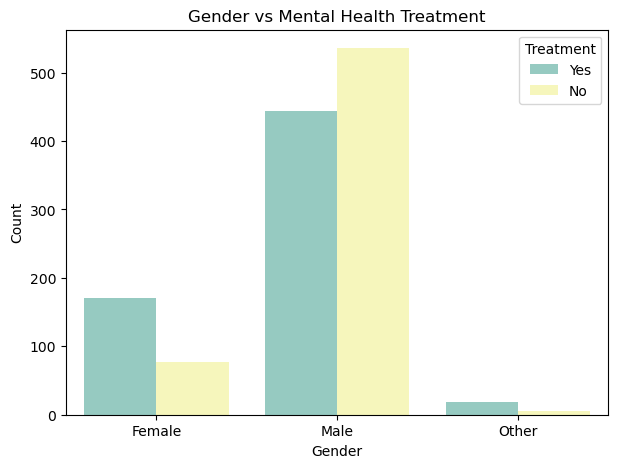

In [69]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', hue='treatment', palette='Set3')
plt.title("Gender vs Mental Health Treatment")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()


#Work Interfere vs Treatment

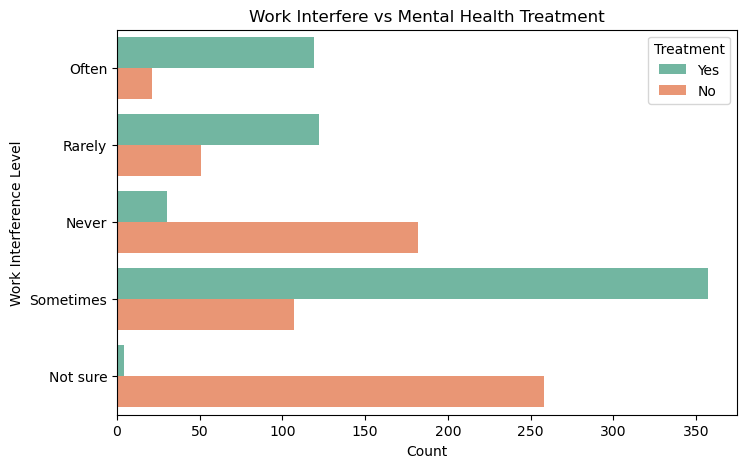

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='work_interfere', hue='treatment', palette='Set2')
plt.title("Work Interfere vs Mental Health Treatment")
plt.xlabel("Count")
plt.ylabel("Work Interference Level")
plt.legend(title="Treatment")
plt.show()


Age Group vs Treatment

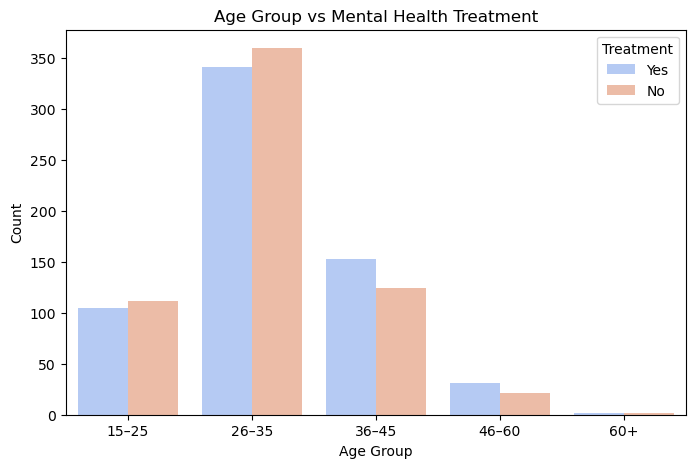

In [75]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 60, 100], 
                         labels=['15–25', '26–35', '36–45', '46–60', '60+'])

# Now plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='treatment', palette='coolwarm')
plt.title("Age Group vs Mental Health Treatment")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()


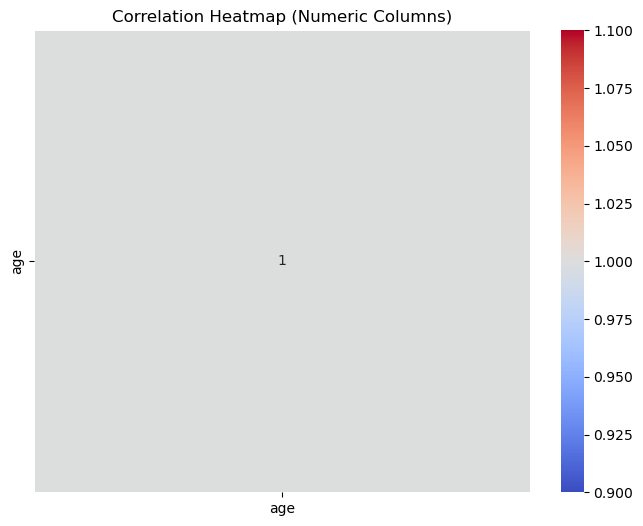

In [77]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()
